In [40]:
%matplotlib inline
from modsim import *
from scipy import*

In [52]:
t0=1740
t_end=2016
t_eruption=1783
p0=45500/1000
birth_rate= .03
death_rate= .01

In [53]:
system = System(t0=t0, 
                t_end=t_end,
                t_eruption=t_eruption,
                p0=p0,
                birth_rate=birth_rate,
                death_rate=death_rate)

In [54]:
from pandas import read_html

In [55]:
filename = 'https://en.wikipedia.org/w/index.php?title=Demographics_of_Iceland&oldid=801858011'
tables= read_html (filename,
                   header = 0,
                   index_col = 0,
                   decimal = 'M')

In [56]:
table1 = tables[1]
table1

,Average population (x 1000),Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rate
Year,,,,,,,,
1900,78,2237,1545,692,28.6,19.8,8.9,3.93
1901,78,2179,1155,1024,27.8,14.7,13.1,3.86
1902,79,2220,1262,958,28.1,16.0,12.1,3.95
1903,79,2244,1324,920,28.3,16.7,11.6,4.00
1904,80,2293,1242,1051,28.7,15.5,13.1,4.09
1905,81,2271,1435,836,28.1,17.8,10.4,4.02
1906,82,2346,1193,1153,28.8,14.6,14.1,4.14
1907,83,2304,1396,908,27.9,16.9,11.0,4.04
1908,83,2270,1594,676,27.3,19.1,8.1,4.01


In [57]:
table1.columns = ['avg_pop','births','deaths','net_change','b_rate','d_rate','npt','fertility']

In [58]:
table1.index

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year', length=117)

In [191]:
avg_pop = table1.avg_pop
avg_pop.index

Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,    0, 1783],
           dtype='int64', name='Year', length=119)

In [60]:
def plot_estimates(table):
    """Plot Icelandic population estimates.
    
    table: DataFrame with column 'avg_pop'
    """
    
    plot(avg_pop, '.-', color='darkblue', label='Avg Population')
    
    decorate(xlabel='Year',
             ylabel='Icelandic Population')

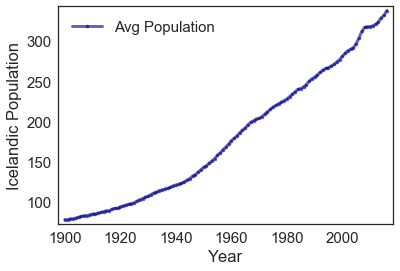

In [61]:
newfig()
plot_estimates(table1)

In [62]:
def eruption(current_pop, death_toll):
    pop_after_eruption = current_pop - current_pop*death_toll
    return pop_after_eruption

In [115]:
def run_simulation(system, update_func, death_toll):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        #print(results[t])
        results[t+1] = update_func(results[t], t, system, death_toll)
    system.results = results

In [64]:
def update_funcP(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t==system.t_eruption:
        pop_t = eruption(pop_t, death_toll)
    net_growth = system.birth_rate * pop_t - system.death_rate * pop_t
    return pop_t + net_growth

In [152]:
def plot_results(system,title=None):
    plot(system.results, "r")
    decorate(xlabel='Years',
             ylabel='Population (in Thousands)',
             title=title)

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


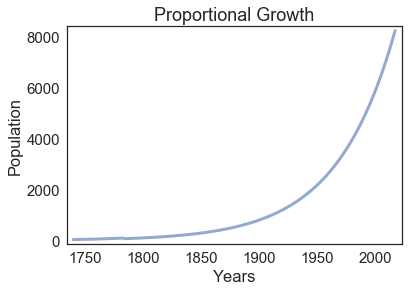

In [66]:
run_simulation(system,update_funcP, .25)
newfig()
plot_results(system,title='Proportional Growth')

In [67]:
def update_funcQ(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t==system.t_eruption:
        pop_t = eruption(pop_t, death_toll)
    net_growth = system.r * pop_t*(1-pop_t/system.K)
        
    return pop_t + net_growth

In [70]:
system.K= 350000/1000
system.r= .015

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


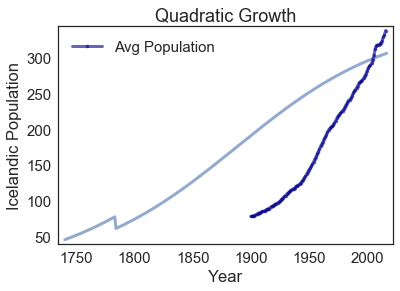

In [71]:
run_simulation(system, update_funcQ, .22)
newfig()
plot_results(system,title='Quadratic Growth')
plot_estimates(table1)

In [72]:
death_toll_array=(0,.1,.2,.3,.4,.5)

In [73]:
def sweep_death_toll(update_func):
    for d in death_toll_array:
        run_simulation(system,update_func, d)
        plot_results(system,title='Death Toll Sweep')
        

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


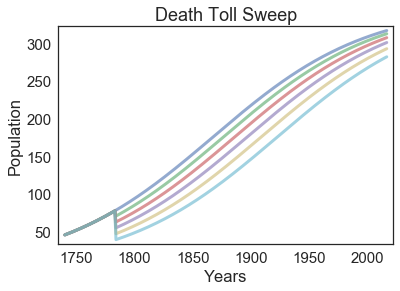

In [74]:
newfig()
sweep_death_toll(update_funcQ)


In [75]:
def updatefuncE(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    
    k: growth rate
    """
    if t==system.t_eruption:
        pop_t = eruption(pop_t, death_toll)
    new_tot = pop_t*e**(k*t)
        
    return new_tot

In [76]:
e = 2.71828
k = .000004
# using .000005 gets us a similar curve, offset

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


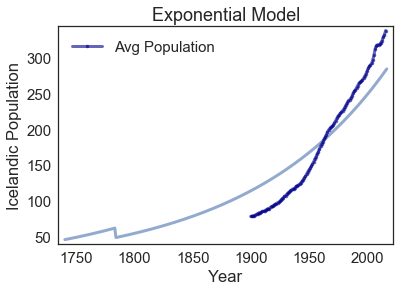

In [77]:
run_simulation(system, updatefuncE, .22)
newfig()
plot_results(system, title='Exponential Model')
plot_estimates(table1)

In [214]:
def updatefuncPoly(pop_t, t, system, death_toll):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #if t==system.t_eruption:
        #pop_t = eruption(pop_t, death_toll)
    #print(a)
    net_growth = a*t**2 + b*t + c
    #print (net_growth)
        
    return net_growth

In [222]:
filename = 'https://en.wikipedia.org/w/index.php?title=Demographics_of_Iceland&oldid=801858011'
tables= read_html (filename,
                   header = 0,
                   index_col = 0,
                   decimal = 'M')
table1 = tables[1]
table1.columns = ['avg_pop','births','deaths','net_change','b_rate','d_rate','npt','fertility']

pop_series = table1.avg_pop
pop_series.index
pop_series.set_value(1783, 35.49)
pop_series = pop_series.sort_values()
[a,b,c]=polyfit(pop_series.index, pop_series.values, 2)

In [223]:
def run_simulation(system, update_func, death_toll):
    """Simulate the system using any update function.
    
    Adds TimeSeries to `system` as `results`.

    system: System object
    update_func: function that computes the population next year
    """
    
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        #print(results[t])
        results[t+1] = update_func(results[t], t, system, death_toll)
    system.results = results

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


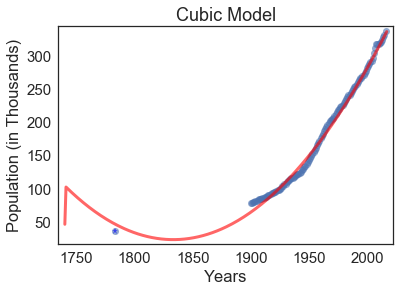

In [228]:
run_simulation(system, updatefuncPoly, .22)
newfig()
plot(pop_series, 'o')
# plot_estimates(table1)
plot_results(system, title='Cubic Model')
plot(1783, 35.49,'b*')

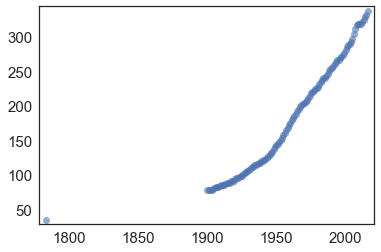

In [227]:
plot(pop_series, 'o')

In [42]:
polyfit(table1.index, table1.avg_pop, 3)

array([ -1.22619400e-04,   7.31890242e-01,  -1.45322181e+03,
         9.60124389e+05])

In [43]:
[a,b,c,d]=polyfit(table1.index, table1.avg_pop, 3)

In [44]:
a

-0.00012261939985526291

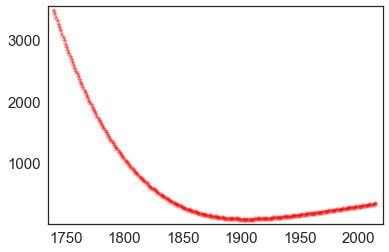

In [105]:
newfig()
[a, b, c, d, e] = polyfit(table1.index, table1.avg_pop, 4)
for i in range(t0, t_end):
    plot(i, a*i**4 + b*i**3 + c*i**2 + d*i + e, 'r*')